In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from scipy import stats
import os
import numpy as np
import glob
from scipy.stats import gaussian_kde

In [2]:
path = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Step6'

In [3]:
AllData = pd.read_csv(path + "\\" + 'AllLight_EveryMoth.csv')
AllData.head()

,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name
0,0,0,20377,20713,NaN,NaN,0,L0.1_c-3_m10
1,1,1,39912,41054,NaN,NaN,1,L0.1_c-3_m10
2,2,2,67784,68084,NaN,NaN,2,L0.1_c-3_m10
3,3,3,68158,69028,NaN,NaN,3,L0.1_c-3_m10
4,4,4,26059,27412,NaN,NaN,0,L0.1_c-3_m12


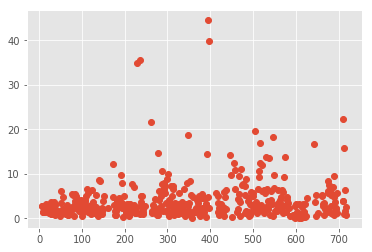

In [4]:
plt.plot(AllData.DiscoveryTime/100, 'o')

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


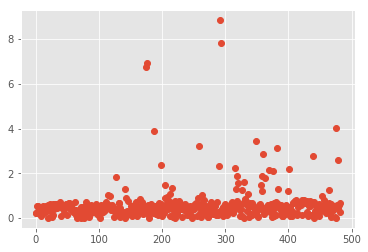

In [5]:
AllData_notnull = AllData[AllData.DiscoveryTime.notnull()]
z = np.abs(stats.zscore(AllData_notnull.DiscoveryTime.values))
outlier_ID = z > 5
plt.plot(z, 'o') 

AllData_notnull['zscore'] = z
AllData_notnull['outlier_ID'] = outlier_ID

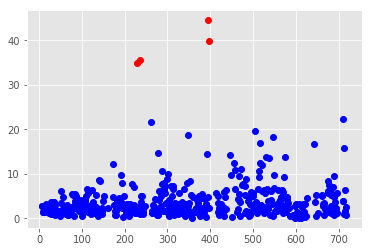

In [6]:
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == True]/100, 'o', color = 'red')
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == False]/100, 'o', color = 'blue')

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


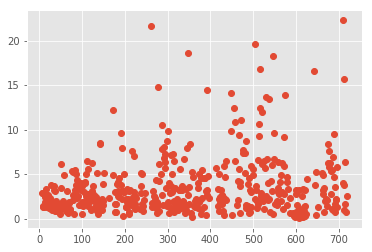

In [7]:
notoutliers = AllData_notnull[AllData_notnull.outlier_ID == False]
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100, axis = 'index')
plt.plot(notoutliers['DiscoveryTime'], 'o')

Text(0.5, 0, 'Occurance')

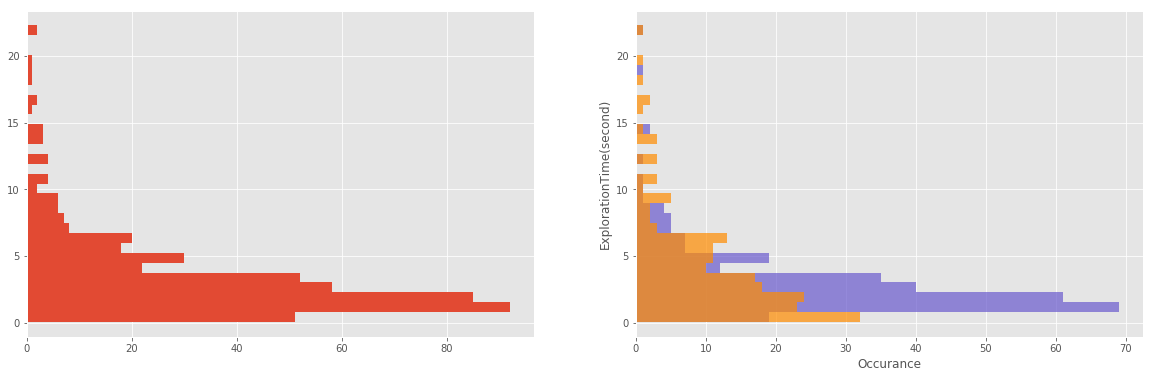

In [8]:
hist, bins = np.histogram(notoutliers.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(notoutliers.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

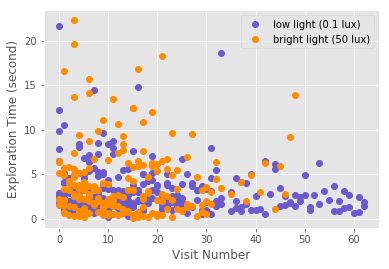

In [9]:
plt.plot(notoutliers[notoutliers.name.str.contains('L0.1')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L0.1')].DiscoveryTime,
         'o', color = 'slateblue', label = 'low light (0.1 lux)')
plt.plot(notoutliers[notoutliers.name.str.contains('L50')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L50')].DiscoveryTime, 
         'o', color = 'darkorange', label = 'bright light (50 lux)')
plt.ylabel('Exploration Time (second)')
plt.xlabel('Visit Number')
plt.legend()

# add exponential curves - color: L50 - chocolate or saddle brown, L0.1 - darkslateblue, or blue violet

In [10]:
# BinnedDataSet
# binsize = 10
# new_column = binLabel 

notoutliers['binLabel'] = ['0-4' if value <=4 
                           else ('5-19' if (value > 4) & (value <= 19) else '20andAbove') 
                           for value in notoutliers['trialNum']]

notoutliers['lightLevel'] = ['low' if 'L0.1' in value 
                           else 'high' for value in notoutliers['name']]

notoutliers.head()

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,binLabel,lightLevel
7,7,7,45940,52780,46222.0,2.82,0,L0.1_c-3_m20,0.203203,False,0-4,low
8,8,8,55058,60805,55341.0,2.83,1,L0.1_c-3_m20,0.201033,False,0-4,low
9,9,9,67612,69165,67744.0,1.32,2,L0.1_c-3_m20,0.528726,False,0-4,low
10,10,10,72461,74177,72606.0,1.45,3,L0.1_c-3_m20,0.500514,False,0-4,low
11,11,11,77368,78421,77499.0,1.31,4,L0.1_c-3_m20,0.530896,False,0-4,low


In [11]:
notoutliers.name.unique()

array(['L0.1_c-3_m20', 'L0.1_c-3_m21', 'L0.1_c-3_m22', 'L0.1_c-3_m25',
       'L0.1_c-3_m2', 'L0.1_c-3_m32', 'L0.1_c-3_m34', 'L0.1_c-3_m38',
       'L0.1_c-3_m40', 'L0.1_c-3_m41', 'L0.1_c-3_m43', 'L0.1_c-3_m44',
       'L0.1_c-3_m5', 'L0.1_c-3_m8', 'L50_c-3_m10', 'L50_c-3_m12',
       'L50_c-3_m13', 'L50_c-3_m14', 'L50_c-3_m15', 'L50_c-3_m21',
       'L50_c-3_m22', 'L50_c-3_m26', 'L50_c-3_m32', 'L50_c-3_m37',
       'L50_c-3_m39', 'L50_c-3_m45', 'L50_c-3_m6', 'L50_c-3_m9'],
      dtype=object)

In [12]:
notoutliers.binLabel.unique()

array(['0-4', '5-19', '20andAbove'], dtype=object)

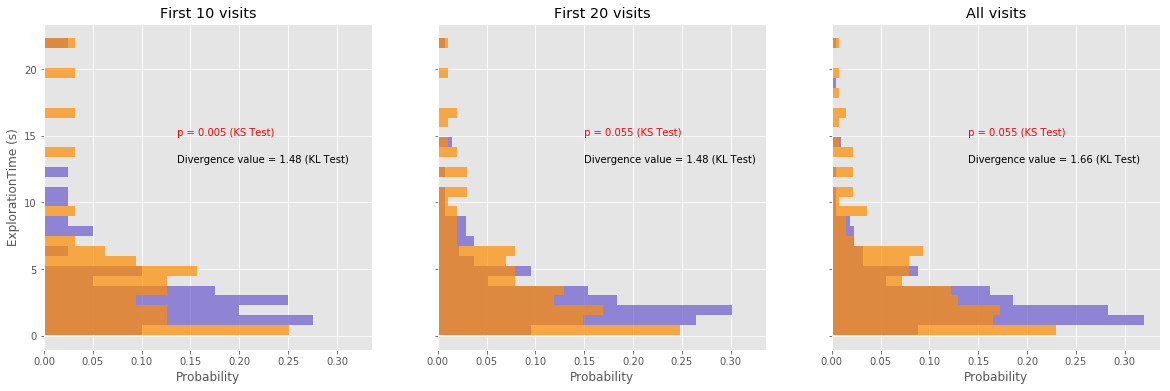

In [13]:
fig, ax = plt.subplots(1,3, figsize = (20,6), sharex = True, sharey = True)
ax = ax.ravel()


hist_5_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel == '0-4')].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_5_Highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel == '0-4')].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[0].set_title('First 10 visits')
ax[0].text(0.1335, 15, ' p = 0.005 (KS Test)', color = 'r' )
ax[0].text(0.136, 13, 'Divergence value = 1.48 (KL Test)')
hist_20_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_20_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[1].set_title('First 20 visits')
ax[1].text(0.147, 15, ' p = 0.055 (KS Test)', color = 'r' )
ax[1].text(0.15, 13, 'Divergence value = 1.48 (KL Test)')

hist_all_lowlight,_, _ = ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_all_highlight, _, _ =ax[2].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)
ax[2].set_title('All visits')
ax[2].text(0.136, 15, ' p = 0.055 (KS Test)', color = 'r' )
ax[2].text(0.14, 13, 'Divergence value = 1.66 (KL Test)')


ax[0].set_ylabel('ExplorationTime (s)')
ax[0].set_xlabel('Probability')
ax[1].set_xlabel('Probability')
ax[2].set_xlabel('Probability')
outpath_figg = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Stats'
# plt.savefig(outpath_figg + "\\" + 'Stats_Plot_First10Visits.png')
# if the plots are normalized to the total number of hits for each window then the size difference in the 20+seconds bin is due to a larger proportion of each condition being from the lower time bins as the moths learn

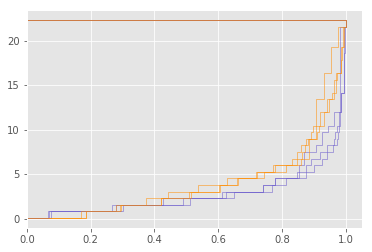

In [14]:
hist_20_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_20_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel != '20andAbove')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')


hist_5_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.binLabel == '0-4')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_5_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.binLabel == '0-4')].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

hist_all_lowlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values,
        bins, density=True, histtype='step', color = 'slateblue',
        cumulative=True, label='lowLight', orientation = 'horizontal')

hist_all_highlight, _, _ = plt.hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_') ].values,
        bins, density=True, histtype='step', color = 'darkorange',
        cumulative=True, label='highLight', orientation = 'horizontal')

In [15]:
def KL(P,Q, epsilon):
# """ Epsilon is used here to avoid conditional code for
# checking that neither P nor Q is equal to 0. """
     epsilon = 1e-20
# You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon
     
     divergence = np.sum(P*np.log(P/Q))
      
     return divergence

In [16]:
KL(hist_5_lowlight, hist_5_highlight, 1e-30)

1.4777633515998825

In [17]:
KL(hist_20_lowlight, hist_20_highlight, 1e-30)

1.475886908899624

In [18]:
KL(hist_all_lowlight, hist_all_highlight, 1e-30)

1.659198198566583

In [19]:
stats.ks_2samp(hist_5_highlight,hist_5_lowlight)

Ks_2sampResult(statistic=0.43333333333333335, pvalue=0.004607065432753843)

In [20]:
stats.ks_2samp(hist_20_highlight,hist_20_lowlight)

Ks_2sampResult(statistic=0.33333333333333337, pvalue=0.054993022248225276)

In [21]:
stats.ks_2samp(hist_all_highlight,hist_all_lowlight)

Ks_2sampResult(statistic=0.3333333333333333, pvalue=0.054993022248225325)

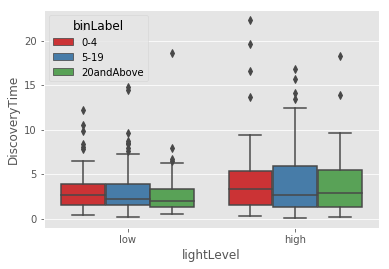

In [22]:
import seaborn as sns
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="lightLevel", y="DiscoveryTime", hue="binLabel", data=notoutliers, palette="Set1")
# sns.plt.show()

In [23]:
test = notoutliers

In [24]:
earlyTrial = notoutliers[notoutliers.trialNum <= 4]
lateTrial = notoutliers[(notoutliers.trialNum > 20) & (notoutliers.trialNum <= 30)]
#look at data to see better lateTrial numbers

In [25]:
def kde_scipy(x):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x)
    return kde

In [26]:
alldata = earlyTrial.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

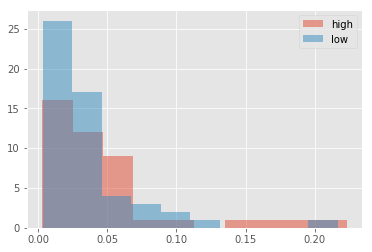

In [27]:
for flower, df in earlyTrial.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

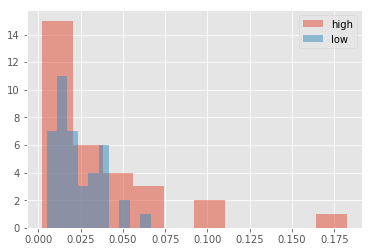

In [28]:
for flower, df in lateTrial.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [29]:
alldata = earlyTrial.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

In [30]:
early_df = pd.DataFrame(index = bin_center, columns = ['low', 'high'], dtype = 'float')
late_df = pd.DataFrame(index = bin_center, columns = ['low', 'high'], dtype = 'float')
SampleSize = pd.DataFrame(index = ['low', 'high'], columns = ['early', 'late'], dtype = 'float')

<Figure size 432x288 with 0 Axes>

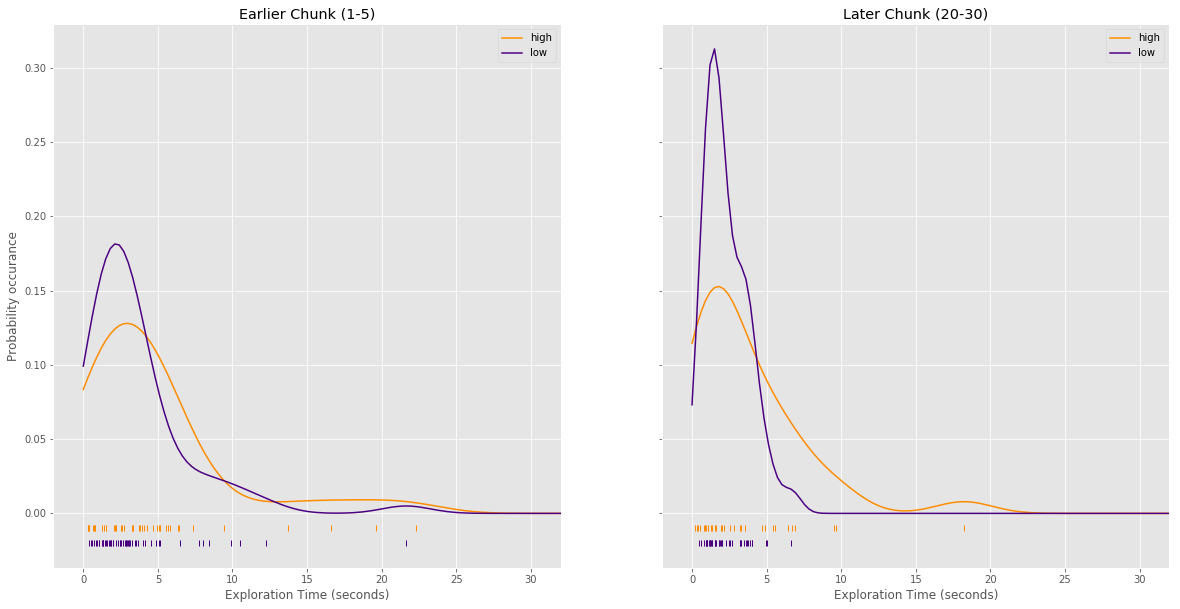

In [32]:
from scipy.stats import gaussian_kde

plt.set_cmap('Spectral')
# f1, ax1 = plt.subplots(1,2,sharex = True, sharey = True, figsize = (15,20))
f2, ax2 = plt.subplots(1,2,sharex = True, sharey = True, figsize = (20,10))

offset = 0
for f, df in earlyTrial.groupby('lightLevel', sort = True):
    
    data = df.DiscoveryTime   
    SampleSize.loc[f,'early'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    early_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
    elif f.startswith("high"):
        c = 'darkorange'
    
#     ax1[0].plot(bin_center, hist)
    p = ax2[0].plot(bin_center, temp, label = f, color = c)
    ax2[0].plot(data, [-0.01 + offset]*len(data), '|', color = c)
    offset+=-0.01
    ax2[0].legend()
    ax2[0].set_title('Earlier Chunk (1-5)')
offset = 0
for f, df in lateTrial.groupby('lightLevel', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'late'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    late_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
    elif f.startswith("high"):
        c = 'darkorange'
    
#     ax1[1].plot(bin_center, hist)
    p = ax2[1].plot(bin_center, temp, label = f, color = c)
    ax2[1].plot(data, [-0.01 + offset]*len(data), '|', color = c)
    offset+=-0.01
    ax2[1].legend()
    ax2[1].set_title('Later Chunk (20-30)')

ax2[0].set_xlabel('Exploration Time (seconds)')
ax2[1].set_xlabel('Exploration Time (seconds)')
ax2[0].set_ylabel('Probability occurance')

ax2[0].set_xlim(-2,32)
plt.savefig(outpath_figg + "\\" + 'Stats_Plot_PDE.png')